In [6]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gamma


%matplotlib widget

In [25]:
# Enable implicit multi-threading (optional)
ROOT.ROOT.EnableImplicitMT()

# Open the ROOT file
file = ROOT.TFile.Open("./data/angles/40deg1.root")
if not file or file.IsZombie():
    print("Error opening file.")


# Get the TTree
tree = file.Get("electrons")
if not tree:
    print("Tree not found.")

# Set up the branch name you want to extract
X_branch = "xf"
Y_branch = 'yf'
T_branch = 'tf'

# Use RDataFrame for convenience
df = ROOT.RDataFrame(tree)

# Convert the branch to a NumPy array
x_array = np.array(df.AsNumpy([X_branch])[X_branch]) * 10 # Convert to mm
y_array = np.array(df.AsNumpy([Y_branch])[Y_branch]) * 10 # Convert to mm
t_array = np.array(df.AsNumpy([T_branch])[T_branch]) # in ns


# Get the angle for this event
tree = file.Get("events")
if not tree:
    print("Tree not found.")
df = ROOT.RDataFrame(tree)
theta = np.array(df.AsNumpy(['theta'])['theta'])[0]
theta = np.radians(theta)  # Convert to radians

layer_1x = 3 * np.tan(theta)
layer_2x = 5 * np.tan(theta)
layer_3x = 7 * np.tan(theta)


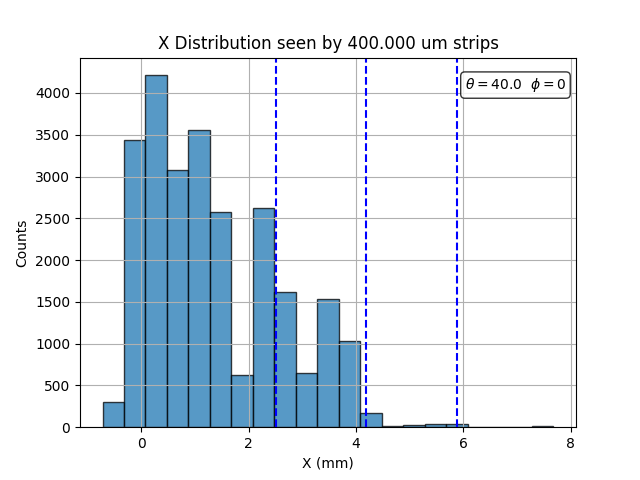

In [26]:
bin_width = 0.4
xmin = min(0, min(x_array))
xmax = max(x_array)
bins = np.arange(xmin, xmax + bin_width, bin_width)

plt.figure()
# Plot histogram
counts, bin_edges, patches = plt.hist(x_array, bins=bins, edgecolor='black', alpha=0.75)

# Add labels and grid
plt.xlabel('X (mm)')
plt.ylabel('Counts')
plt.title(f'X Distribution seen by {bin_width*1000:.3f} um strips')
plt.text(0.98, 0.95, f'$\\theta = {np.degrees(theta):.1f}$  $\\phi = 0$', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.axvline(layer_1x, color='blue', linestyle='--', label='Layer 1')
plt.axvline(layer_2x, color='blue', linestyle='--', label='Layer 2')
plt.axvline(layer_3x, color='blue', linestyle='--', label='Layer 3')
plt.grid(True)

plt.show()

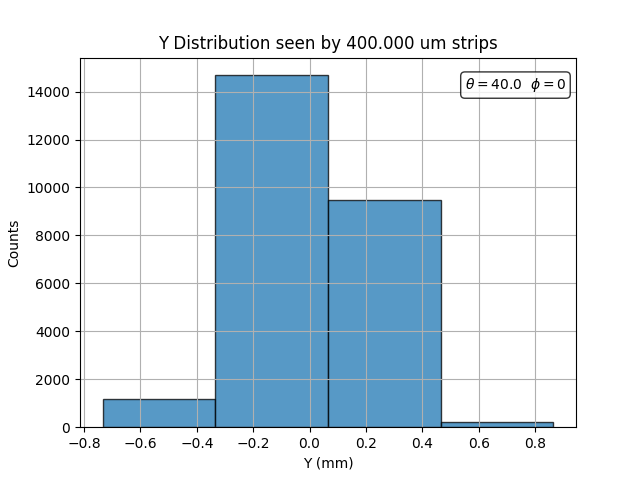

In [27]:
bin_width = 0.4
xmin = min(0, min(y_array))
xmax = max(y_array)
bins = np.arange(xmin, xmax + bin_width, bin_width)

plt.figure()
# Plot histogram
counts, bin_edges, patches = plt.hist(y_array, bins=bins, edgecolor='black', alpha=0.75)
plt.text(0.98, 0.95, f'$\\theta = {np.degrees(theta):.1f}$  $\\phi = 0$', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add labels and grid
plt.xlabel('Y (mm)')
plt.ylabel('Counts')
plt.title(f'Y Distribution seen by {bin_width*1000:.3f} um strips')
plt.grid(True)

plt.show()

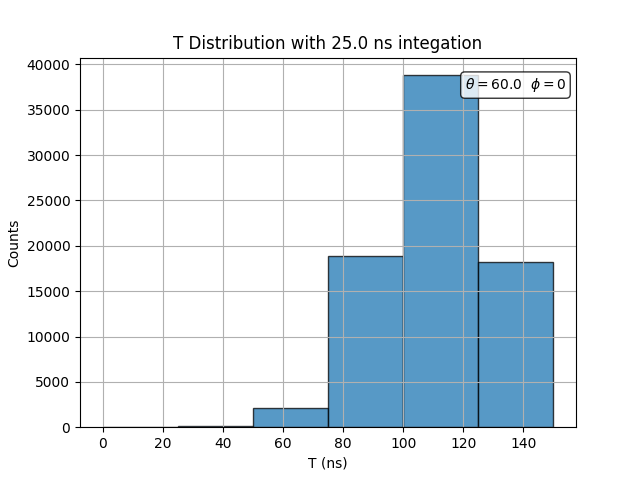

In [22]:
bin_width = 25  # ns
xmin = 0
xmax = max(t_array)
bins = np.arange(xmin, xmax + bin_width, bin_width)

plt.figure()
# Plot histogram
counts, bin_edges, patches = plt.hist(t_array, bins=bins, edgecolor='black', alpha=0.75)
plt.text(0.98, 0.95, f'$\\theta = {np.degrees(theta):.1f}$  $\\phi = 0$', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add labels and grid
plt.xlabel('T (ns)')
plt.ylabel('Counts')
plt.title(f'T Distribution with {bin_width:.1f} ns integation')
plt.grid(True)

plt.show()

In [28]:
tree = file.Get("sec_electrons")
if not tree:
    print("Tree not found.")
    exit()

df = ROOT.RDataFrame(tree)

X_branch = "x"
Y_branch = 'y'
Z_branch = 'z'
G_branch = 'gain'

# Convert the branch to a NumPy array
x2_array = np.array(df.AsNumpy([X_branch])[X_branch]) * 10 # Convert to mm
y2_array = np.array(df.AsNumpy([Y_branch])[Y_branch]) * 10 # Convert to mm
z2_array = np.array(df.AsNumpy([Z_branch])[Z_branch]) * 10 # Convert to mm
g_array = np.array(df.AsNumpy([G_branch])[G_branch]) 


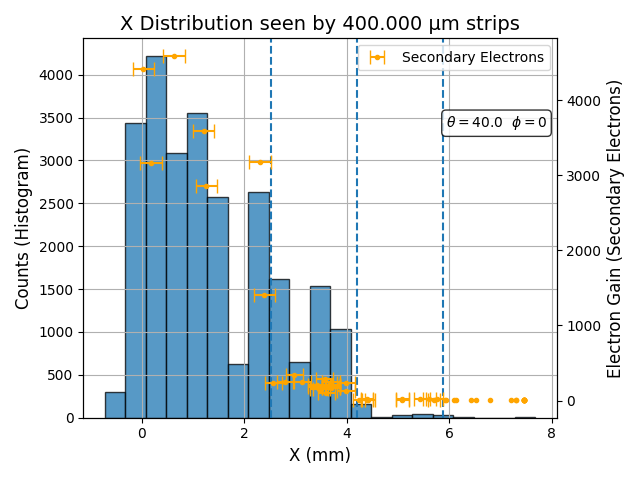

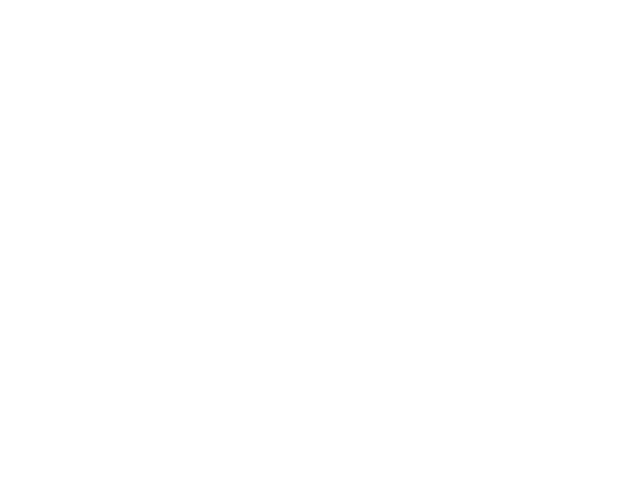

In [34]:
plt.figure()
bin_width = 0.4
xmin = min(0, min(x_array))
xmax = max(x_array)
bins = np.arange(xmin, xmax + bin_width, bin_width)

xerr = []
for x in x2_array:
    if x < layer_1x:
        xerr.append(np.sqrt(3) * 0.12)
    elif x < layer_2x:
        xerr.append(np.sqrt(2) * 0.12)
    elif x < layer_3x:
        xerr.append(0.12)
    else:
        xerr.append(np.nan)

# Create axes
fig, ax1 = plt.subplots()

# Histogram on left y-axis
counts, bin_edges, patches = ax1.hist(x_array, bins=bins, edgecolor='black', alpha=0.75)
ax1.set_xlabel('X (mm)', fontsize=12)
ax1.set_ylabel('Counts (Histogram)', fontsize=12)
ax1.tick_params(axis='y')

ax1.text(0.98, 0.8, f'$\\theta = {np.degrees(theta):.1f}$  $\\phi = 0$', transform=ax1.transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


# Add vertical layer lines
for lx in [layer_1x, layer_2x, layer_3x]:
    ax1.axvline(lx, linestyle='--')

# Second y-axis for gain
ax2 = ax1.twinx()
ax2.errorbar(x2_array, g_array, xerr=xerr, fmt='o', capsize=5, markersize=3, label='Secondary Electrons', color='orange')
ax2.set_ylabel('Electron Gain (Secondary Electrons)', fontsize=12)
ax2.tick_params(axis='y',)


# Title and grid
plt.title(f'X Distribution seen by {bin_width*1000:.3f} µm strips', fontsize=14)
plt.legend()
ax1.grid(True)

fig.tight_layout()
plt.show()
